# 1st Prject - OIL PRICE PREDICTION

Objective:
Oil is a product that goes completely in a different direction for a single market event as the oil 
prices are rarely based on real-time data, instead, it is driven by externalities making our 
attempt to forecast it even more challenging
As the economy will be highly affected by oil prices our model will help to understand the 
pattern in prices to help the customers and businesses to make smart decisions.

In [5]:
# importing dataset and libraries

import pandas as pd 

In [6]:
# loading dataset
# Specify the path to your .xls file

file_path = 'D:\\projects\\datasets\\DCOILWTICO (1).xls'

# Read the .xls file using pandas
df = pd.read_excel(file_path)
df


,Date,Price
0,2012-04-02,105.25
1,2012-04-03,104.02
2,2012-04-04,101.53
3,2012-04-05,103.29
4,2012-04-06,NaN
...,...,...
2916,2023-06-06,71.71
2917,2023-06-07,72.52
2918,2023-06-08,71.28
2919,2023-06-09,70.16


# performing exploratory data analysis (EDA)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2921 entries, 0 to 2920
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2921 non-null   datetime64[ns]
 1   Price   2812 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 45.8 KB


In [8]:
df.describe

<bound method NDFrame.describe of            Date   Price
0    2012-04-02  105.25
1    2012-04-03  104.02
2    2012-04-04  101.53
3    2012-04-05  103.29
4    2012-04-06     NaN
...         ...     ...
2916 2023-06-06   71.71
2917 2023-06-07   72.52
2918 2023-06-08   71.28
2919 2023-06-09   70.16
2920 2023-06-12   67.08

[2921 rows x 2 columns]>

In [11]:
# Count the null values in each column

df.isnull().sum()

Date       0
Price    109
dtype: int64

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

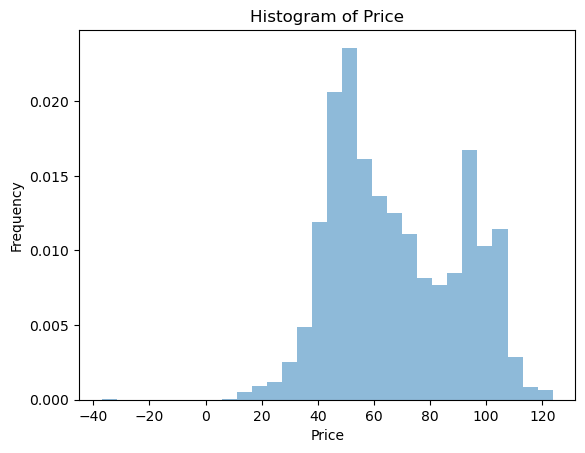

The Price data is not normally distributed.


In [24]:
# Drop rows with missing values (NaN)

df = df.dropna(subset=['Price'])

# Plot a histogram

plt.hist(df['Price'], bins=30, density=True, alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

# Perform a normality test

p_value = stats.normaltest(df['Price']).pvalue

# Set the significance level
alpha = 0.05

# Check the normality test result
if p_value < alpha:
    print("The Price data is not normally distributed.")
else:
    print("The Price data is normally distributed.")

In [26]:
median = df['Price'].median()
median

63.455

In [27]:
# Fill null values with column means

df.fillna(median)

,Date,Price
0,2012-04-02,105.25
1,2012-04-03,104.02
2,2012-04-04,101.53
3,2012-04-05,103.29
5,2012-04-09,102.45
...,...,...
2916,2023-06-06,71.71
2917,2023-06-07,72.52
2918,2023-06-08,71.28
2919,2023-06-09,70.16


In [28]:
df.isnull().sum()

Date     0
Price    0
dtype: int64

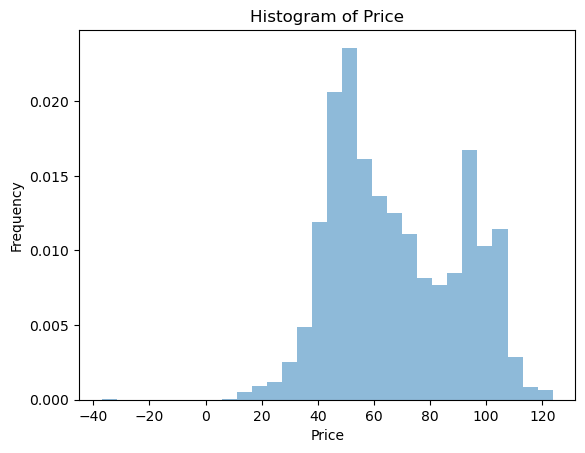

In [29]:
plt.hist(df['Price'], bins=30, density=True, alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

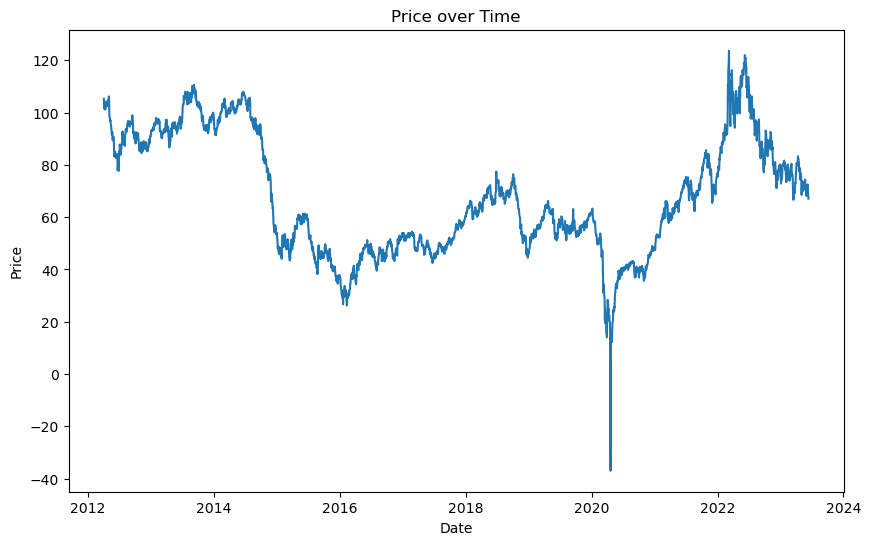

In [30]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price over Time')
plt.show()


In [31]:
# Check for missing values
print(df.isnull().sum())




Date     0
Price    0
dtype: int64


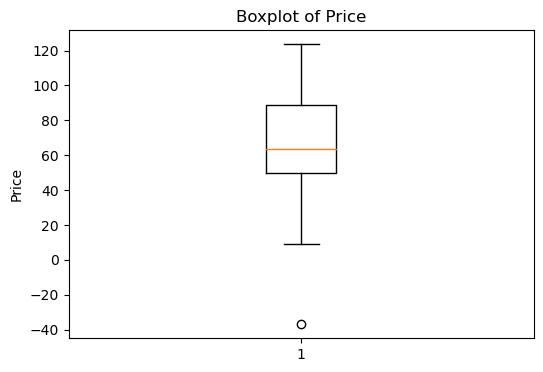

In [32]:
# Check for outliers
plt.figure(figsize=(6, 4))
plt.boxplot(df['Price'])
plt.ylabel('Price')
plt.title('Boxplot of Price')
plt.show()

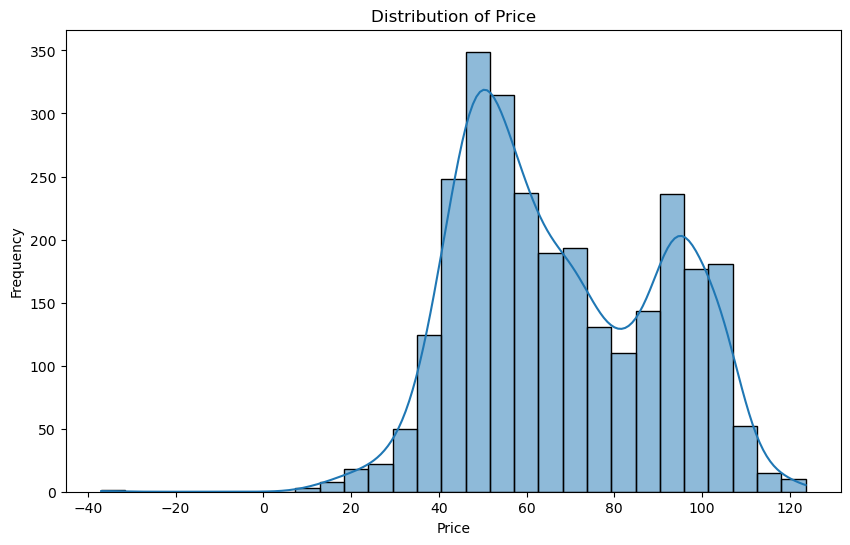

In [34]:
# Data distribution visualization
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

C:\Users\Usee\AppData\Local\Temp\ipykernel_18072\276109227.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


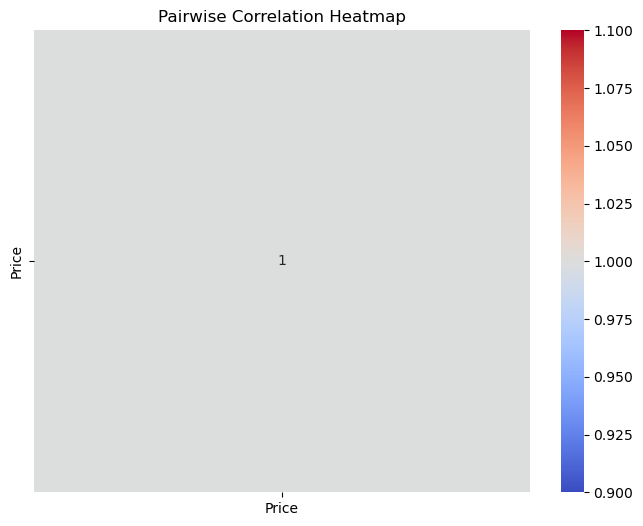

In [35]:
# Pairwise correlation
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Pairwise Correlation Heatmap')
plt.show()

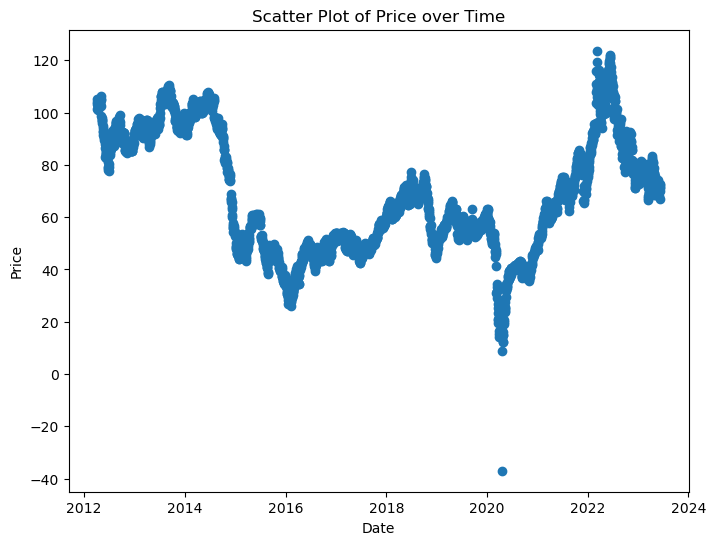

In [36]:
# Scatter plot (if applicable)
plt.figure(figsize=(8, 6))
plt.scatter(df['Date'], df['Price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Scatter Plot of Price over Time')
plt.show()

In [40]:
# Feature engineering
df['Date'] = pd.to_datetime(df['Date'])  # Convert Date column to datetime type
df['Year'] = df['Date'].dt.year  # Extract Year from Date
df['Month'] = df['Date'].dt.month  # Extract Month from Date

X = df[['Year', 'Month']]
y = df['Price']

In [41]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
X_train, X_test, y_train, y_test

(      Year  Month
 2218  2020     10
 2523  2021     12
 1060  2016      4
 1129  2016      7
 664   2014     10
 ...    ...    ...
 1697  2018     10
 1134  2016      8
 1170  2016      9
 1340  2017      5
 890   2015      8
 
 [2249 rows x 2 columns],
       Year  Month
 415   2013     11
 2347  2021      3
 1231  2016     12
 307   2013      6
 1138  2016      8
 ...    ...    ...
 2020  2019     12
 958   2015     12
 1237  2016     12
 1418  2017      9
 2267  2020     12
 
 [563 rows x 2 columns],
 2218    38.51
 2523    66.60
 1060    41.67
 1129    41.54
 664     82.80
         ...  
 1697    76.40
 1134    41.83
 1170    45.60
 1340    50.81
 890     49.20
 Name: Price, Length: 2249, dtype: float64,
 415     94.58
 2347    59.19
 1231    52.22
 307     93.66
 1138    43.51
         ...  
 2020    61.66
 958     41.08
 1237    54.01
 1418    49.10
 2267    45.48
 Name: Price, Length: 563, dtype: float64)

In [44]:
# Model training
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
# Model prediction
y_pred = model.predict(X_test)

In [46]:
y_pred

array([73.403672  , 63.02432153, 68.78653901, 74.3097677 , 69.51141557,
       65.80037829, 71.74381491, 59.91471132, 67.67033934, 60.06704563,
       66.01048225, 59.52338821, 66.55413967, 72.46869147, 61.57456841,
       67.67033934, 64.1405212 , 66.19170139, 63.95930206, 73.19356803,
       64.5318443 , 73.73722546, 68.21399676, 64.50295948, 63.02432153,
       75.2158634 , 74.12854856, 70.23629214, 63.02432153, 71.71493008,
       60.42948392, 70.26517696, 68.03277762, 69.12009247, 70.23629214,
       68.03277762, 64.32174034, 74.3097677 , 69.14897729, 74.7010908 ,
       65.98159743, 62.84310239, 62.66188325, 65.25672087, 67.4891202 ,
       75.06352909, 61.36446444, 73.94732942, 66.73535882, 63.20554067,
       71.74381491, 74.3097677 , 60.45836874, 68.57643505, 69.87385385,
       65.61915915, 73.403672  , 68.57643505, 72.64991061, 61.54568358,
       70.23629214, 62.11822583, 69.33019643, 66.19170139, 68.03277762,
       68.96775815, 65.43794001, 71.53371094, 73.01234889, 69.33

In [48]:
# Evaluation
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

In [49]:
mse

483.12085892649435

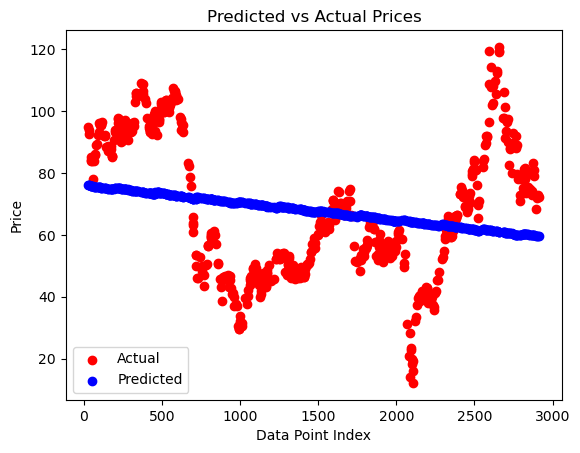

In [55]:
# Plotting the predicted vs actual prices
plt.scatter(X_test.index, y_test, color='red', label='Actual')
plt.scatter(X_test.index, y_pred, color='blue', label='Predicted')
plt.xlabel('Data Point Index')
plt.ylabel('Price')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()